In [1]:
from keras.datasets import cifar10

Using TensorFlow backend.


In [2]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [3]:
# Data set of 50000 images of 32 x 32 pxs with 3 color channels
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_train[0].shape

(32, 32, 3)

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

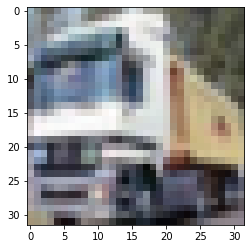

In [6]:
plt.imshow(x_train[1])

In [7]:
# Normalizing data (that has max of 255)
x_train = x_train / 255
x_test = x_test / 255

In [8]:
# Convert labels to HOT ONE code

In [9]:
from keras.utils import to_categorical

In [10]:
# We have 10 possible labels
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test, 10)

In [11]:
# Build model
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [15]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 800)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               205056    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                2570      
Total para

In [17]:
# Train model
model.fit(x_train, y_cat_train,verbose=1,epochs=10)

Epoch 1/10
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5246 - acc: 0.4561
Epoch 2/10
50000/50000 [==============================] - 56s 1ms/step - loss: 1.1635 - acc: 0.5957
Epoch 3/10
50000/50000 [==============================] - 66s 1ms/step - loss: 1.0056 - acc: 0.6525
Epoch 4/10
50000/50000 [==============================] - 64s 1ms/step - loss: 0.9010 - acc: 0.6899
Epoch 5/10
50000/50000 [==============================] - 65s 1ms/step - loss: 0.8155 - acc: 0.7213
Epoch 6/10
50000/50000 [==============================] - 68s 1ms/step - loss: 0.7512 - acc: 0.7445
Epoch 7/10
50000/50000 [==============================] - 60s 1ms/step - loss: 0.6982 - acc: 0.7630
Epoch 8/10
50000/50000 [==============================] - 69s 1ms/step - loss: 0.6439 - acc: 0.7812
Epoch 9/10
50000/50000 [==============================] - 63s 1ms/step - loss: 0.6096 - acc: 0.7946
Epoch 10/10
50000/50000 [==============================] - 59s 1ms/step - loss: 0.5703 - acc: 0.8078

In [19]:
model.metrics_names

['loss', 'acc']

In [20]:
model.evaluate(x_test,y_cat_test)

10000/10000 [==============================] - 4s 367us/step


[1.2087784309387206, 0.656]

In [21]:
from sklearn.metrics import classification_report

In [22]:
predictions = model.predict_classes(x_test)

In [23]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.77      0.63      0.69      1000
          1       0.74      0.83      0.78      1000
          2       0.62      0.49      0.55      1000
          3       0.42      0.52      0.46      1000
          4       0.71      0.57      0.64      1000
          5       0.44      0.68      0.53      1000
          6       0.92      0.59      0.72      1000
          7       0.79      0.66      0.72      1000
          8       0.73      0.80      0.77      1000
          9       0.71      0.79      0.75      1000

avg / total       0.69      0.66      0.66     10000

